# Epic Machine Learning Battle

![GPU vs CPU](https://s30.postimg.org/fflzue7tt/GPUvs_CPUBanner.jpg)

In [52]:
import h2o
from h2o.estimators.xgboost import H2OXGBoostEstimator

In [77]:
h2o.connect(ip="104.196.36.245")

Connecting to H2O server at http://104.196.36.245:54321... successful.


H2O cluster uptime:,2 hours 4 mins
H2O cluster version:,3.13.0.313
H2O cluster version age:,2 days
H2O cluster name:,olmsteadbrett
H2O cluster total nodes:,1
H2O cluster free memory:,1.578 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://104.196.36.245:54321
H2O connection proxy:,None


<H2OConnection to http://104.196.36.245:54321, session _sid_9d58>

In [ ]:
# Import some data from Amazon S3
h2oDF = h2o.import_file("https://s3-us-west-1.amazonaws.com/dsclouddata/LendingClubData/LoansGoodBad.csv")

# Stratified Split into Train/Test
stratsplit = h2oDF["Bad_Loan"].stratified_split(test_frac=0.3, seed=12349453)
train = h2oDF[stratsplit=="train"]
test = h2oDF[stratsplit=="test"]


In [55]:
# Identify predictors and response
x = train.columns
y = "Bad_Loan"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [ ]:
train.head(5)

In [75]:
%%time
XGB_GPU = H2OXGBoostEstimator(model_id="XGB_on_GPU", ntrees=500, max_depth=9, learn_rate=0.05, backend="gpu", gpu_id=0)
XGB_GPU.train(x=x, y=y, training_frame=train, validation_frame=test)
print "Accuracy AUC: " + XGB.auc()

xgboost Model Build progress: |████████████████████████████████████████████| 100%
0.896744250525
CPU times: user 208 ms, sys: 32 ms, total: 240 ms
Wall time: 19 s


In [60]:
%%time
XGB_CPU = H2OXGBoostEstimator(model_id="XGB_on_CPU", ntrees=500, max_depth=9, learn_rate=0.05, backend="cpu")
XGB_CPU.train(x=x, y=y, training_frame=train, validation_frame=test)
print "Accuracy AUC: " + XGB_CPU.auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%
CPU times: user 644 ms, sys: 68 ms, total: 712 ms
Wall time: 3min 27s


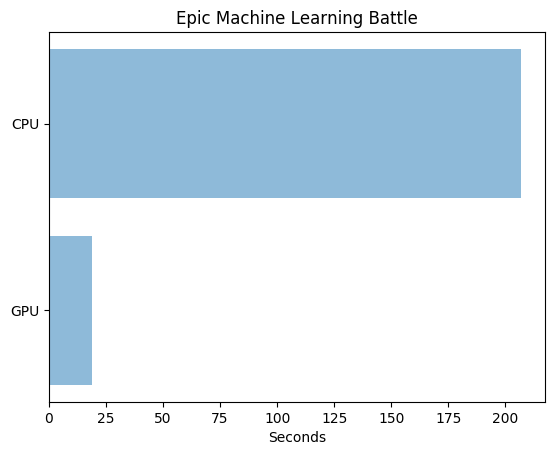

In [80]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('GPU', 'CPU')
y_pos = np.arange(len(objects))
seconds = [19,207]
 
plt.barh(y_pos, seconds, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Seconds')
plt.title('Epic Machine Learning Battle')
 
plt.show()